# Auto Regression Model(AR) 
used for forcasting

Yt =C+b1 Yt-1+ b2 Yt-2+……+ bp Yt-p+ Ert

Key Parameters

p=past values
Yt=Function of different past values
Ert=errors in time
C=intercept

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
temp_data=pd.read_csv('dailymintemperatures (1).csv',index_col=0)

In [7]:
temp_data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [8]:
temp_data.shape

(3650, 1)

In [9]:
temp_data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


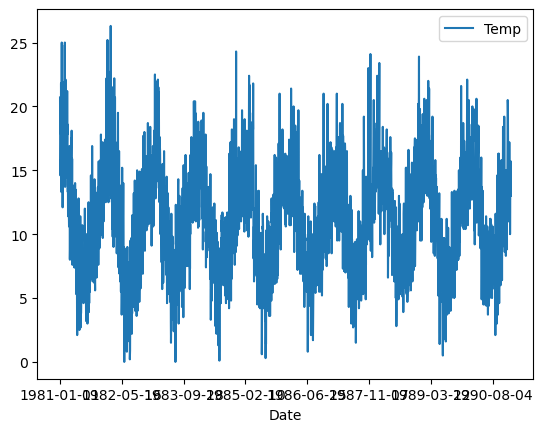

In [10]:
#time plot
temp_data.plot()
plt.show()

In [11]:
#autocorrelation plot
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

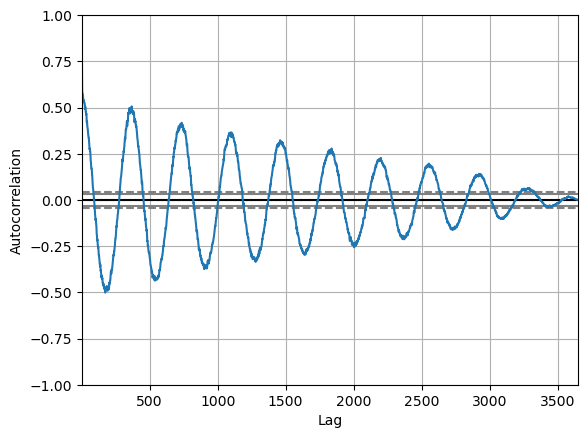

In [12]:
autocorrelation_plot(temp_data['Temp'])

In [13]:
x=temp_data.values

In [14]:
x

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

In [15]:
len(x)

3650

In [16]:
len(x)-7

3643

In [17]:
train,test=x[1:len(x)-7],x[len(x)-7:]

In [18]:
train

array([[17.9],
       [18.8],
       [14.6],
       ...,
       [13.2],
       [13.9],
       [10. ]])

In [19]:
test

array([[12.9],
       [14.6],
       [14. ],
       [13.6],
       [13.5],
       [15.7],
       [13. ]])

In [20]:
train.shape

(3642, 1)

In [21]:
test.shape

(7, 1)

# fitting the model

In [22]:
from statsmodels.tsa.ar_model import AutoReg

In [23]:
AR=AutoReg(train,lags=29)
AR_model_fit=AR.fit()

In [24]:
#prediction
prediction=AR_model_fit.predict(start=len(train),end=len(train)+len(test)-1)
prediction

array([11.87127485, 13.05379422, 13.53259095, 13.24312646, 13.09143803,
       13.14698884, 13.17615346])

In [25]:
print(len(train))

3642


In [26]:
len(train)+len(test)-1

3648

In [ ]:
#lets compare the predicted value and the expected value

In [27]:
for i in range(len(prediction)):
    print('predicted value=',prediction[i],',','expected value=',test[i])

predicted value= 11.871274847727818 , expected value= [12.9]
predicted value= 13.053794217229793 , expected value= [14.6]
predicted value= 13.532590951105092 , expected value= [14.]
predicted value= 13.243126458186184 , expected value= [13.6]
predicted value= 13.091438030687936 , expected value= [13.5]
predicted value= 13.146988838852185 , expected value= [15.7]
predicted value= 13.176153455574156 , expected value= [13.]


In [29]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse=sqrt(mean_squared_error(test,prediction))
print('rmse=:%4f'%rmse)

rmse=:1.225367


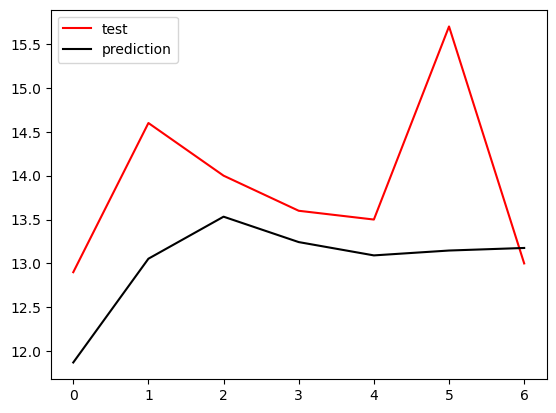

In [32]:
plt.plot(test,color='red',label='test')
plt.plot(prediction,color='black',label='prediction')
plt.legend()
plt.show()